In [1]:
#4) Use titanic dataset. Use the attributes: Class of the room, Sex, Age, number of siblings/spouses, number of parents/children, passenger fare and port of embarkation information. Compare the result of Naïve bayes Classifier with the Decision tree classifier. (Easy)

In [2]:
#Import packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

# Fetching Data

In [3]:
#Import data
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.shape

(156, 12)

In [6]:
df_num = df.copy()

# Analyzing the data:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


# Data Cleaning 

In [9]:
df.value_counts

<bound method DataFrame.value_counts of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
151          152         1       1   
152          153         0       3   
153          154         0       3   
154          155         0       3   
155          156         0       1   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                           

In [10]:
df.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
df['PassengerId'] = le.fit_transform(df['PassengerId'])
df['Survived'] = le.fit_transform(df['Survived'])
df['Pclass'] = le.fit_transform(df['Pclass'])
df['Name'] = le.fit_transform(df['Name'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Age'] = le.fit_transform(df['Age'])
df['SibSp'] = le.fit_transform(df['SibSp'])
df['Parch'] = le.fit_transform(df['Parch'])
df['Ticket'] = le.fit_transform(df['Ticket'])
df['Fare'] = le.fit_transform(df['Fare'])
df['Embarked'] = le.fit_transform(df['Embarked'])


df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,19,1,19,1,0,103,6,NaN,2
1,1,1,0,33,0,37,1,0,124,82,C85,0
2,2,1,2,59,0,23,0,0,142,17,NaN,2
3,3,1,0,47,0,34,1,0,8,75,C123,2
4,4,0,2,1,1,34,0,0,92,19,NaN,2


In [13]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
151        False     False   False  False  False  False  False  False   False   
152        False     False   False  False  False  False  False  False   False   
153        False     False   False  False  False  False  False  False   False   
154        False     False   False  False  False  False  False  False   False   
155        False     False   False  False  Fals

In [14]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,0,33,0,37,1,0,124,82,C85,0
3,3,1,0,47,0,34,1,0,8,75,C123,2
6,6,0,0,78,1,47,0,0,13,73,E46,2
10,10,1,2,125,0,3,1,1,130,44,G6,2
11,11,1,0,17,0,50,0,0,5,56,C103,2
21,21,1,1,15,1,33,0,0,25,35,D56,2
23,23,1,0,132,1,25,0,0,6,67,A6,2
27,27,0,0,45,1,16,3,2,15,92,C23 C25 C27,2
31,31,1,0,134,0,56,1,0,120,90,B78,0
52,52,1,0,57,0,45,1,0,121,84,D33,0


In [15]:
df.shape

(156, 12)

In [16]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
151        False     False   False  False  False  False  False  False   False   
152        False     False   False  False  False  False  False  False   False   
153        False     False   False  False  False  False  False  False   False   
154        False     False   False  False  False  False  False  False   False   
155        False     False   False  False  Fals

In [17]:
df.columns
X=df[[ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,19,1,0,6,2
1,0,0,37,1,0,82,0
2,2,0,23,0,0,17,2
3,0,0,34,1,0,75,2
4,2,1,34,0,0,19,2
...,...,...,...,...,...,...,...
151,0,0,19,1,0,81,2
152,2,1,49,0,0,19,2
153,2,1,40,0,2,38,2
154,2,1,56,0,0,7,2


In [18]:
df.columns
Y=df[['Survived']]
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
151,1
152,0
153,0
154,0


In [19]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [20]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
#Training the Naive Bayes model on the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [22]:
Y_pred  =  classifier.predict(X_test)

In [23]:
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [24]:
Y_test

,Survived
26,0
54,0
37,0
112,0
24,0
7,0
45,0
107,1
137,0
40,0


In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
ac = accuracy_score(Y_test,Y_pred)

In [26]:
# now preparing our model as per Gaussian Naive Bayesian

from sklearn.naive_bayes import GaussianNB

model = GaussianNB().fit(X_train, Y_train) #fitting our model

In [27]:
Y_pred = model.predict(X_test) #now predicting our model to our test dataset

In [28]:
print (ac)

0.78125


In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
clf=DecisionTreeClassifier(random_state=0,criterion="gini")
clf.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [32]:
y_pred = clf.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred)*100)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.50      0.71      0.59         7

    accuracy                           0.78        32
   macro avg       0.70      0.76      0.72        32
weighted avg       0.82      0.78      0.79        32

[[20  5]
 [ 2  5]]
78.125


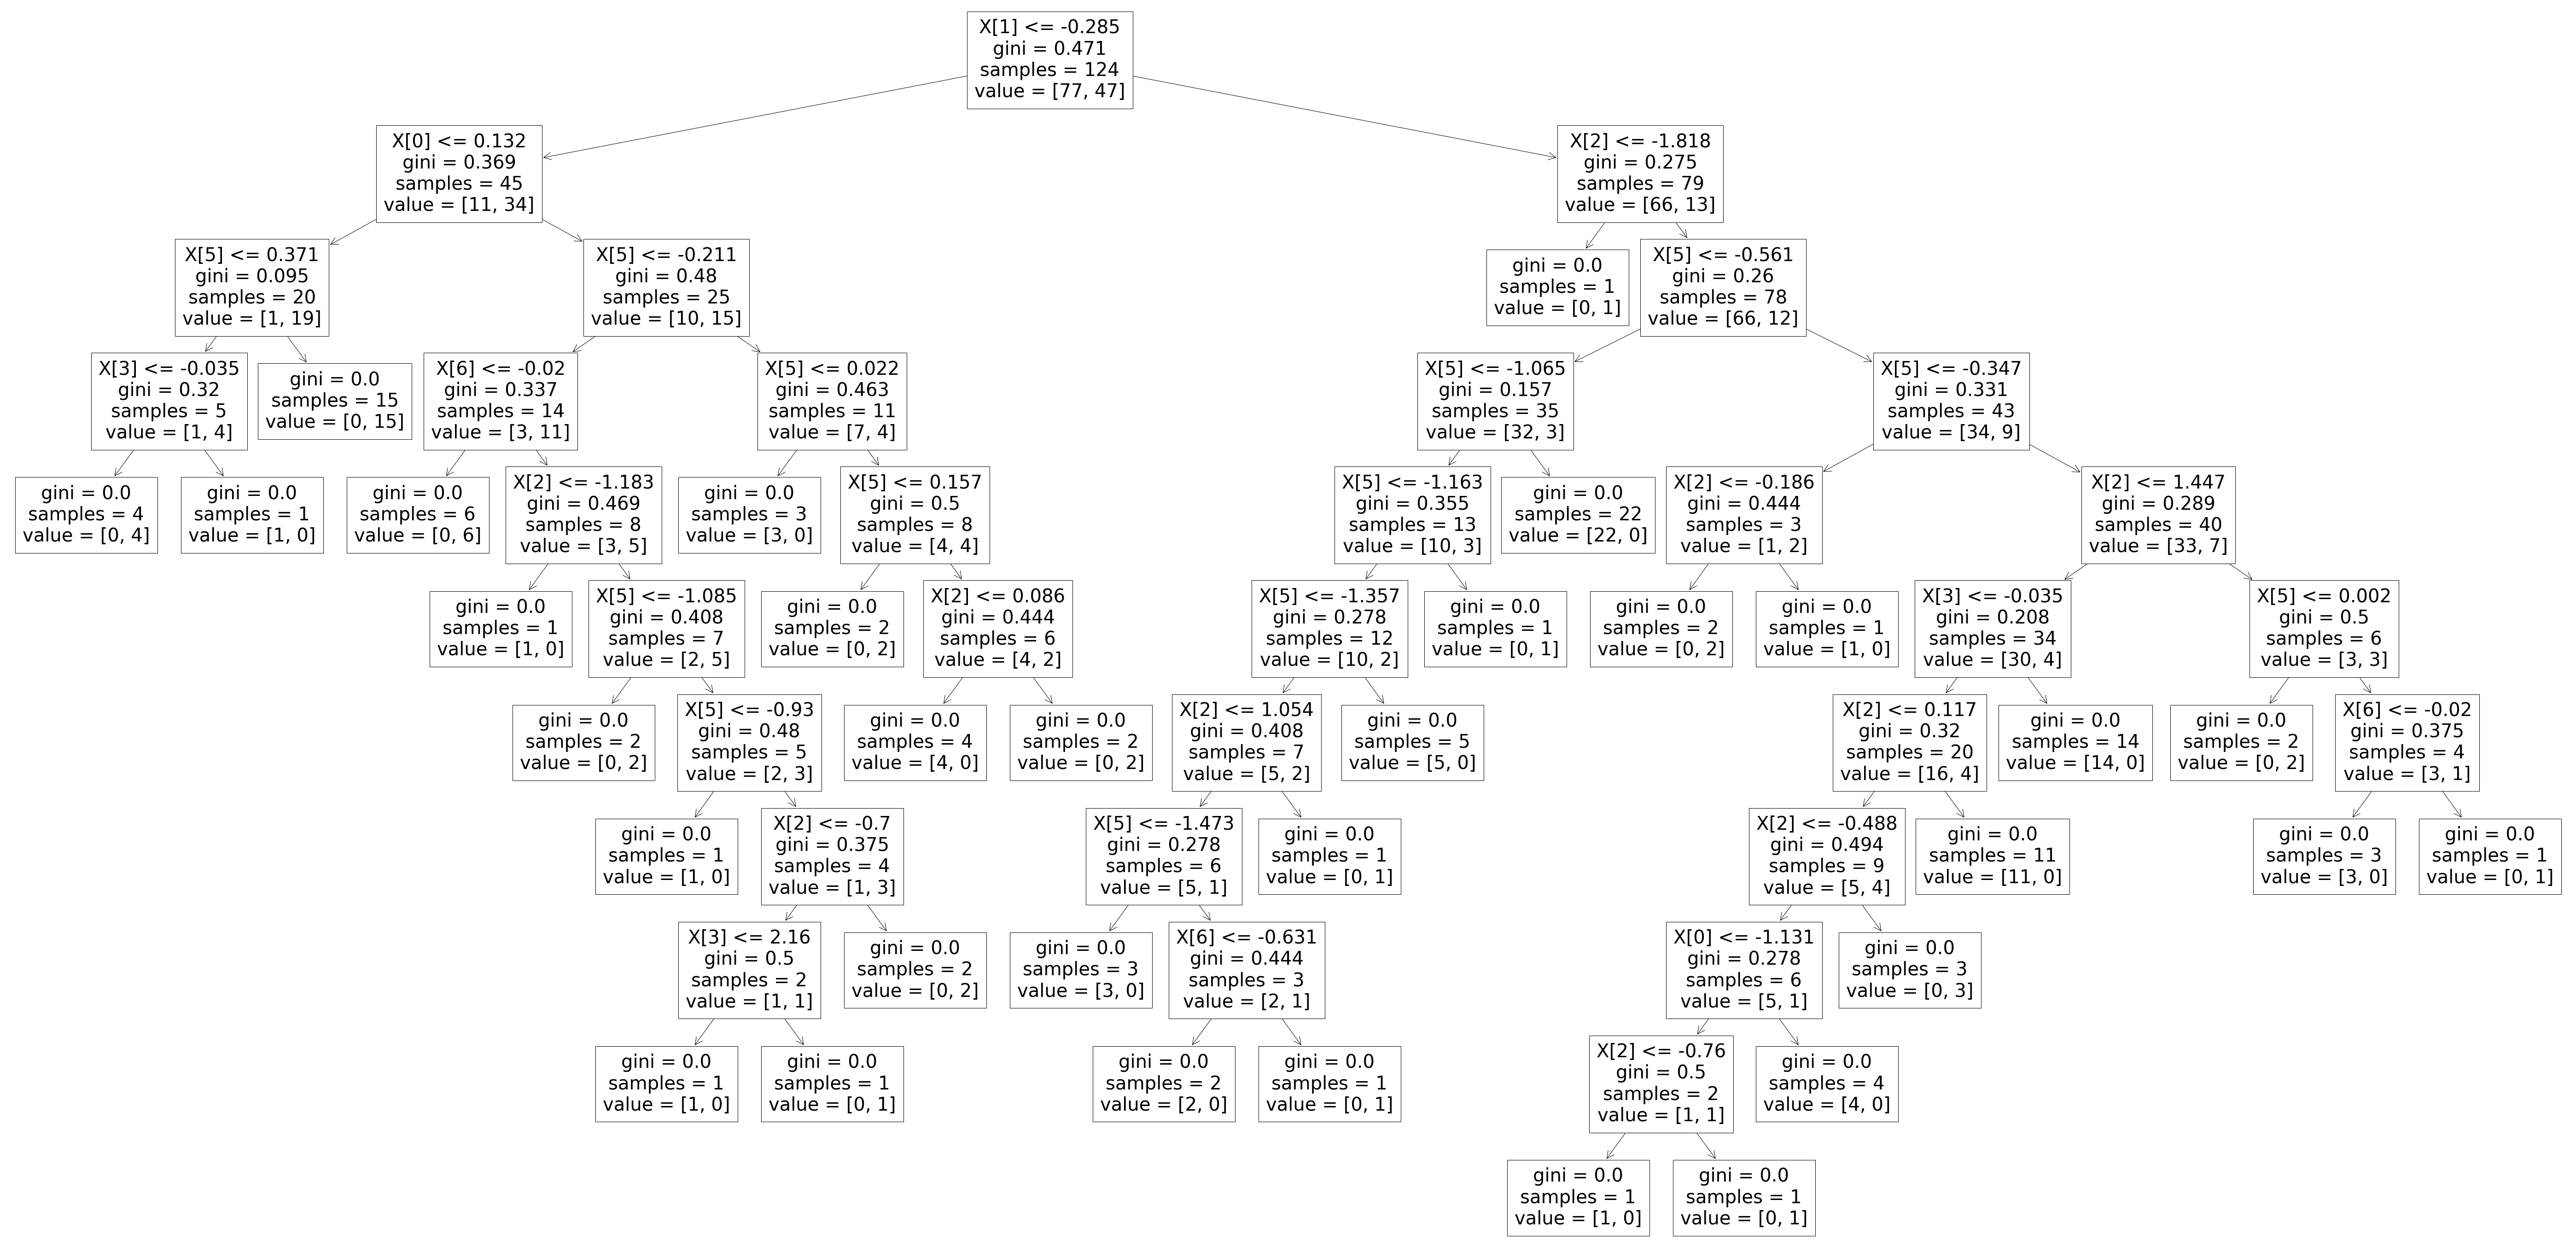

In [33]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(100,50))
tree.plot_tree(clf.fit(X_train, Y_train))
plt.show()